#  Flip Square Submatrix Vertically
You are given an m x n integer matrix grid, and three integers x, y, and k.

The integers x and y represent the row and column indices of the top-left corner of a square submatrix and the integer k represents the size (side length) of the square submatrix.

Your task is to flip the submatrix by reversing the order of its ROWS vertically.

Return the updated matrix.


# approach:
 1) access the target matrix  inside the root matrix 
 2) now flip that matrix  
 3) matrix is a list inside list so we can reverse it use reverse() method of list and access it by 2D indices so do it in code 
 
 

In [ ]:
import numpy as np


    

def flipmatrix(rm, x,y,k):
    mat =[]
    for i in range(k):
        row =[]
        for j in range (k):
            newrow = rm[x+j][y+i]
            row.append(newrow)
            j+=1
        mat.append(list(row.__reversed__()))
        i+=1
    return list(map(list, zip(*mat))
rm = [[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16]]
print(rm[0], "\n",rm[1], "\n",rm[2], "\n", rm[3], "\n")
print(flipmatrix(rm, 1,0,3))

print()




[1, 2, 3, 4] 
 [5, 6, 7, 8] 
 [9, 10, 11, 12] 
 [13, 14, 15, 16] 

[[13, 14, 15], [9, 10, 11], [5, 6, 7]]



In [ ]:
    import numpy as np

    def flipmatrix(grid, x, y, k):
        arr = np.array(grid)  # convert to numpy array for slicing
        
        # Extract the submatrix
        sub = arr[x:x+k, y:y+k]
        
        # Flip vertically (reverse ROWS)
        sub_flipped = np.flipud(sub)
        
        # Put it back into the original array
        arr[x:x+k, y:y+k] = sub_flipped
        
        # Convert back to list of lists
        return arr.tolist()

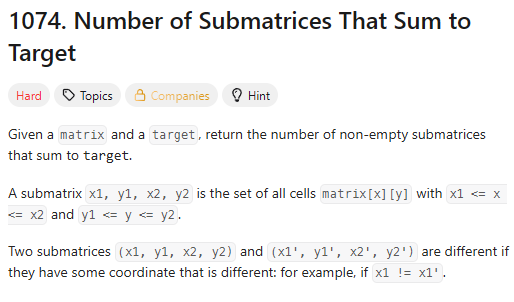   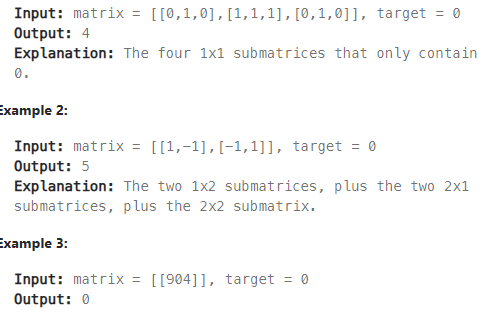

Approach:


In [ ]:
matrix = [[0,1,0],[1,1,1],[0,1,0]], target = 0
def allmat(matrix,target ):
    count =[0]
    for i in range(matrix[0])
    summat = sum(m1+m2+..)

    if summat ==target :
        count+=1
        return count
    

        


In [4]:
l1 = [12,14,15]
l2 = [14,35,11]
print(sum(l1+l2))

101


In [ ]:
matrix = [[0,1,0],[1,1,1],[0,1,0]] 
target = 0
ROWS, COLS = len(matrix), len(matrix[0])
sub_mat_sum = [[0]*COLS for _ in range (ROWS)]

for r in range (ROWS):
    for c in range (COLS):
        top = sub_mat_sum[r-1][c] if r>0 else 0
        left = sub_mat_sum[r][c-1] if r>0 else 0
        top_left = sub_mat_sum[r-1][c-1] if min(r,c)>0 else 0
        sub_mat_sum[r][c] = matrix[r][c]+ top + left - top_left

from collections import defaultdict
res = 0
for r1 in range(ROWS):
    for r2 in range(r1,ROWS):
        count = defaultdict(int)
        count[0] = 1
        for c in range(COLS):
            cur_sum = sub_mat_sum[r2][c]-(sub_mat_sum[r1-1][c] if r1>0 else 0 )
            diff = cur_sum - target
            res +=count[diff]
            
            count[cur_sum]+=1
print(res)


7


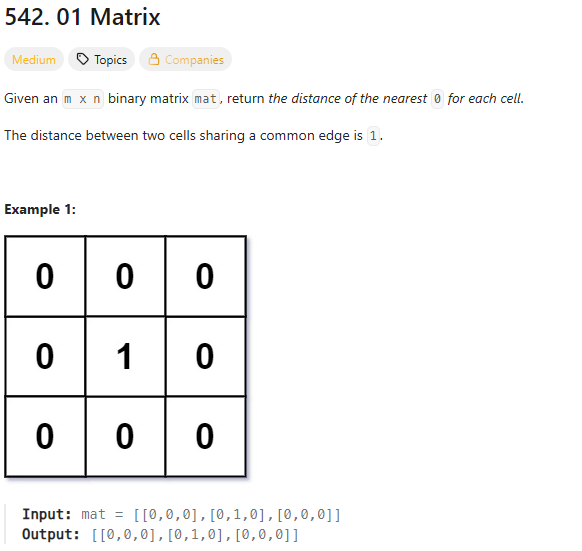
-  example 2 
Input: mat = [[0,0,0],[0,1,0],[1,1,1]]
Output: [[0,0,0],[0,1,0],[1,2,1]]
 
# Intuition
we need find out the nearesst distance of 0 so , find out the adjacent boxes =: one box=> finds its neighbour 
- when somethin find then use searching techniques : BFS or DFS 
- Bfs is better but we need a trick = multisource bfs [check below for details]
- 
# Approach
🔹 Correct & Efficient Solution (Multi-source BFS)

The idea:

- Instead of starting BFS from every 1 separately, we start from all 0s at once (multi-source BFS).

- Then spread outward, marking distance layer by layer.




# Complexity
🔹 Time & Space Complexity

- Time: O(m × n) (each cell visited once).

- Space: O(m × n) for result + BFS queue.
# Code
```python3 []
from collections import deque

class Solution:
    def updateMatrix(self, mat):
        rows, cols = len(mat), len(mat[0])
        result = [[-1] * cols for _ in range(rows)]
        q = deque()

        # Step 1: push all zeros into the queue
        for r in range(rows):
            for c in range(cols):
                if mat[r][c] == 0:
                    result[r][c] = 0
                    q.append((r, c))

        # Step 2: BFS expansion
        directions = [(1,0), (-1,0), (0,1), (0,-1)]
        while q:
            r, c = q.popleft()
            for dr, dc in directions:
                nr, nc = r + dr, c + dc
                if 0 <= nr < rows and 0 <= nc < cols and result[nr][nc] == -1:
                    result[nr][nc] = result[r][c] + 1
                    q.append((nr, nc))

        return result


```
# 🔹 Key Concepts for Similar Questions

When to use BFS over DFS

- If problem asks for shortest path in unweighted grid/graph → always BFS.

- DFS is better for "explore all paths", "count islands", "connected components".

#### Multi-source BFS

- Instead of starting from one point, sometimes you start from all sources (like all zeros here).

- Common in “nearest distance” problems.

- Dynamic Programming Alternative

#### Another solution: Two DP passes (top-left → bottom-right and bottom-right → top-left).

- Each cell’s distance = min(neighbor + 1, current).

- BFS is usually easier to code.

Great problem! The goal is to split $n$ into exactly $k$ positive integers whose product is $n$, while making those integers as close to each other as possible (i.e., minimizing `max(factors) - min(factors)`).

## Key idea (balanced factor packing)

Factorize $n$ into its prime factors (e.g., $100 = 2^2 \cdot 5^2 \Rightarrow [5,5,2,2]$).
Then **distribute these prime factors across $k$ buckets** so the buckets’ products stay balanced:

* Start with $k$ buckets initialized to 1.
* Sort prime factors in **descending** order.
* Repeatedly multiply the **current smallest product** bucket by the next prime factor (use a min-heap).
* This greedily keeps bucket products as even as possible → minimizes `max - min`.

This works well and is optimal for these constraints (small $k \le 5$, $n \le 10^5$).

---

## Python (clean, efficient, handles input/output)

```python
import sys
import math
import heapq

def prime_factors(n: int):
    """Return the prime factors of n as a list (with multiplicity)."""
    factors = []
    # factor 2s
    while n % 2 == 0:
        factors.append(2)
        n //= 2
    # odd factors
    f = 3
    while f * f <= n:
        while n % f == 0:
            factors.append(f)
            n //= f
        f += 2
    # leftover prime
    if n > 1:
        factors.append(n)
    return factors

def split_into_k_factors(n: int, k: int):
    """
    Split n into exactly k positive integers (product equals n),
    minimizing the difference between max and min among the k integers.
    Returns a list of length k.
    """
    # 1) factorize n
    factors = prime_factors(n)
    # sort descending so large primes get placed first (better balancing)
    factors.sort(reverse=True)

    # 2) start k buckets with product 1, keep a min-heap by product
    # heap elements: (product, index)
    heap = [(1, i) for i in range(k)]
    heapq.heapify(heap)
    products = [1] * k  # to retrieve final values

    # 3) distribute prime factors to the current smallest product bucket
    for p in factors:
        prod, idx = heapq.heappop(heap)
        prod *= p
        products[idx] = prod
        heapq.heappush(heap, (prod, idx))

    # 4) if we had fewer than k prime factors, some buckets remain 1 (allowed)
    return products

def main():
    data = sys.stdin.read().strip().split()
    # Accept either:
    # - two integers n k on one line
    # - or "n = X, k = Y" type? (We’ll assume two ints for contest-style input)
    if len(data) >= 2:
        n = int(data[0])
        k = int(data[1])
    else:
        raise SystemExit("Provide two integers: n k")

    ans = split_into_k_factors(n, k)
    print(ans)

if __name__ == "__main__":
    main()
```

### How it behaves on the examples

* `n=100, k=2` → factors: `[5,5,2,2]`
  heap distribution → `[10, 10]` ✅
* `n=44, k=3` → factors: `[11,2,2]`
  heap distribution → `[11, 2, 2]` (any order) ✅

---

## Why this minimizes the difference

By always multiplying the **smallest** bucket next, we keep all bucket products close to each other. Since multiplication expands gaps quickly, front-loading bigger primes into the currently smallest product is the best way to control spread.

---

## Complexity

* Factorization up to $10^5$: $O(\sqrt{n})$.
* Distributing at most \~$\log_2 n$ prime factors with heap operations: $O(P \log k)$ where $P$ is the number of prime factors (with multiplicity).
  Overall very fast for the given constraints.

---

## Tips for similar problems

* **“Split to minimize max-min while product/sum is fixed”** → balance with a heap/priority queue.
* **Product constraints** → factorize and distribute multiplicatively.
* **Small k** → greedy is excellent; DP/backtracking over all partitions is overkill.
* Always confirm if **1s are allowed** (positive integers → yes). This lets you keep exactly k parts.


In [1]:
from typing import List
import heapq

class Solution:
    def minDifference(self, n: int, k: int) -> List[int]:
        # Helper: factorize n into its prime factors
        def prime_factors(x: int) -> List[int]:
            factors = []
            while x % 2 == 0:
                factors.append(2)
                x //= 2
            f = 3
            while f * f <= x:
                while x % f == 0:
                    factors.append(f)
                    x //= f
                f += 2
            if x > 1:
                factors.append(x)
            return factors

        # Step 1: prime factors of n
        factors = prime_factors(n)
        factors.sort(reverse=True)  # place larger factors first

        # Step 2: initialize k "buckets" as 1
        products = [1] * k
        heap = [(1, i) for i in range(k)]  # (current_product, index)
        heapq.heapify(heap)

        # Step 3: distribute prime factors to keep balance
        for p in factors:
            prod, idx = heapq.heappop(heap)
            prod *= p
            products[idx] = prod
            heapq.heappush(heap, (prod, idx))

        return products


In [ ]:
sol = Solution()
print(sol.minDifference(180, 2))  # [1, 10]
print(sol.minDifference(44, 3))   # [11, 2, 2]


[10, 18]
[11, 2, 2]
